In [13]:
# species name of fish

# weight of fish in Gram g

# vertical length in cm

# diagonal length in cm

# cross length in cm

# height in cm

# diagonal width in cm


In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

import warnings
warnings.simplefilter(action='ignore')
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)
%matplotlib inline

In [15]:
df = pd.read_csv('Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [16]:
df.shape

(159, 7)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [18]:
df.rename(columns={'Length1' : 'vertical length', 'Length2' : 'diagonal length', 'Length3' : 'cross length',
                   'Width':'diagonal Width'},inplace=1)

In [19]:
df.head()

,Species,Weight,vertical length,diagonal length,cross length,Height,diagonal Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [20]:
df.describe()

,Weight,vertical length,diagonal length,cross length,Height,diagonal Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [22]:
x = df['Species'].value_counts()
x

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

<AxesSubplot:xlabel='Species'>

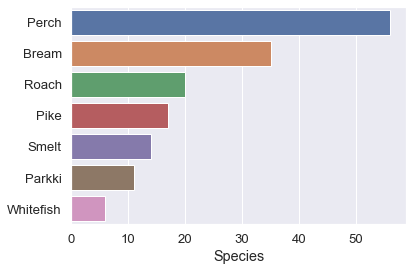

In [23]:
sns.barplot(x=x, y=x.index) # sns.countplot(df['Species'])   or  df['Species'].value_counts().plot.bar()

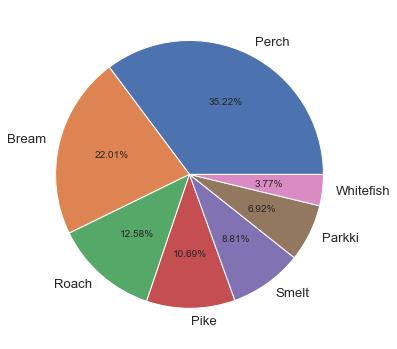

In [24]:
plt.figure(figsize=(6, 8))
plt.pie(x, labels = x.index, autopct='%1.2f%%')
plt.show()

# Get Distribution of Columns

In [25]:
num_col = df._get_numeric_data()
num_col

,Weight,vertical length,diagonal length,cross length,Height,diagonal Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


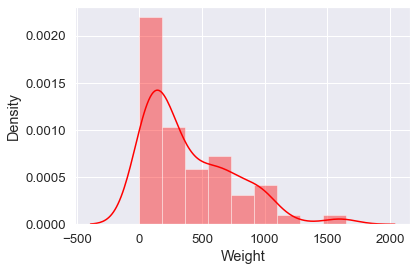

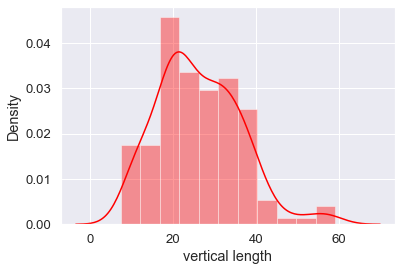

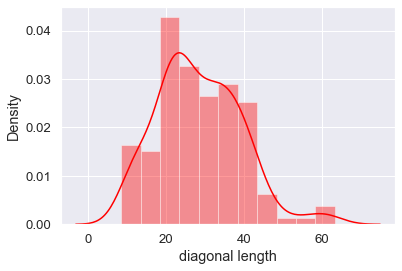

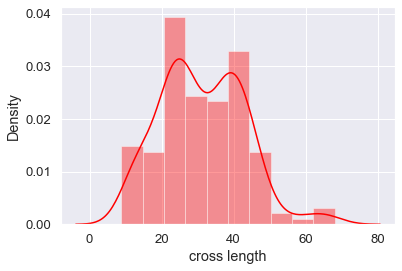

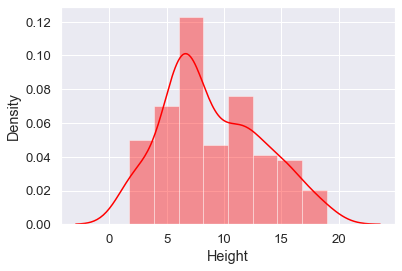

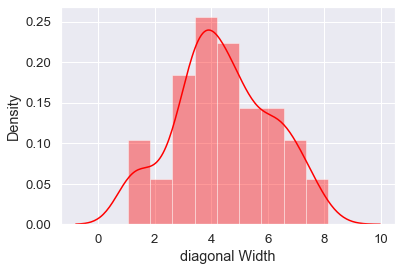

In [26]:
for col in num_col:
    sns.distplot(df[col], color='red')
    plt.show()

# Detect Outliers 

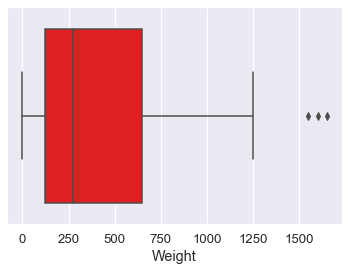

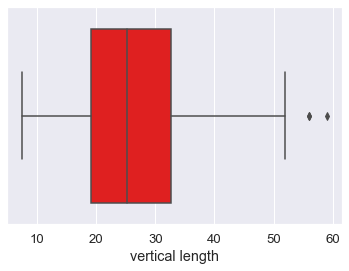

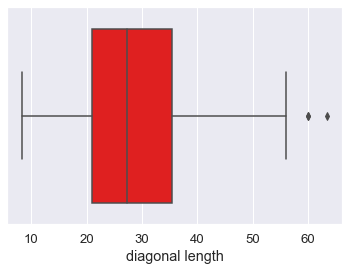

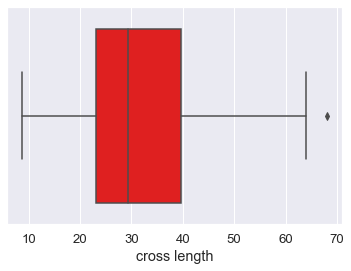

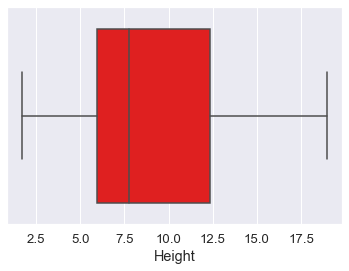

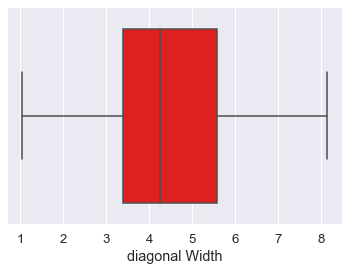

In [27]:
for col in num_col:
    sns.boxplot(df[col], color='red')
    plt.show()

In [30]:
df[df['Weight']>1500]

,Species,Weight,vertical length,diagonal length,cross length,Height,diagonal Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [34]:
df[df['Weight']==0]

,Species,Weight,vertical length,diagonal length,cross length,Height,diagonal Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [21]:
df[df['Weight']>0]

,Species,Weight,vertical length,diagonal length,cross length,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [36]:
df['Weight'].describe()

count     159.000000
mean      398.326415
std       357.978317
min         0.000000
25%       120.000000
50%       273.000000
75%       650.000000
max      1650.000000
Name: Weight, dtype: float64

In [38]:
df[df['Weight']>0]['Weight'].mean()

400.84746835443036

In [37]:
df[df['Weight']>0]['Weight'].median()

281.5

In [39]:
df['Weight'] = df['Weight'].apply(lambda x: df[df['Weight']>0]['Weight'].median() if x <= 0 else x)

In [49]:
df.loc[40]

Species             Roach
Weight              281.5
vertical length      19.0
diagonal length      20.5
cross length         22.8
Height             6.4752
diagonal Width     3.3516
Name: 40, dtype: object

# Get Distribution For Weight

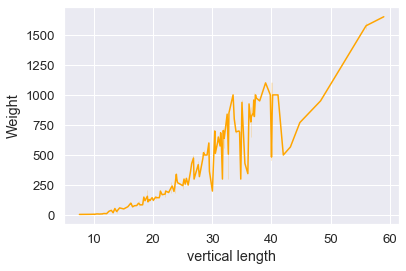

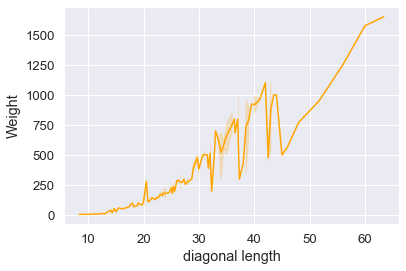

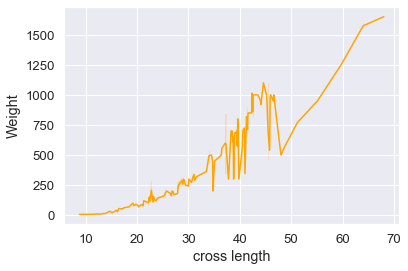

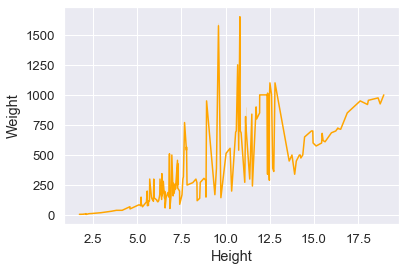

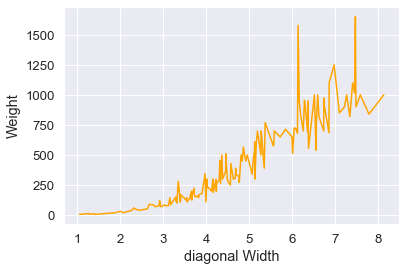

In [50]:
for col in num_col:
    if col != 'Weight':
        sns.lineplot(x=df[col], y=df['Weight'], color='orange')
        plt.show()

# Encode Categories Columns

In [51]:
df = pd.get_dummies(df, drop_first=True)

In [52]:
df

,Weight,vertical length,diagonal length,cross length,Height,diagonal Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,1,0


# Get Correlation

<AxesSubplot:>

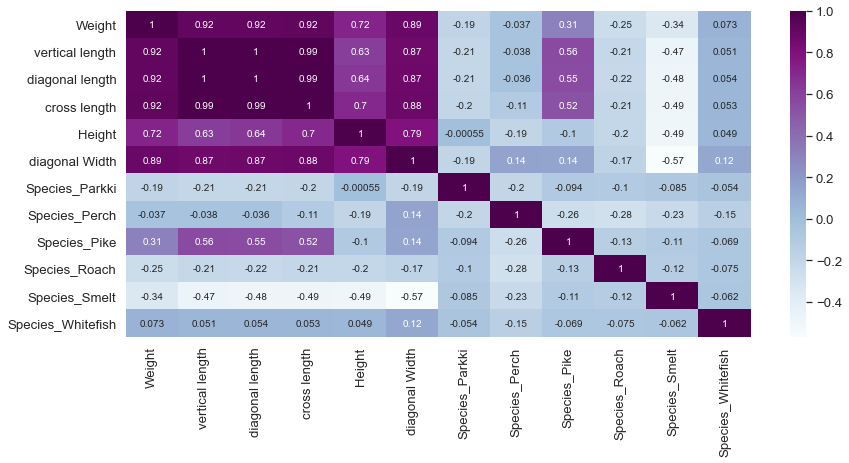

In [56]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(), annot=True, cmap='BuPu')

# Make Regression Model 

In [57]:
x = df.drop('Weight', axis=1)
y = df['Weight'] 

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [59]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [60]:
models = {
    "LR": LinearRegression(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(),
    "XGBR": XGBRegressor(),
    "KNNR" : KNeighborsRegressor(), 
    "SVR": SVR()
}

In [61]:
for name, model in models.items():
    print('-'*30)
    print(f'Using model: {name}')
    
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    
    y_pred = model.predict(x_test)
    print(f'Test Score: {r2_score(y_test, y_pred)}')  

------------------------------
Using model: LR
Training Score: 0.9257105595799063
Test Score: 0.9510713562678582
------------------------------
Using model: DT
Training Score: 0.99991921274166
Test Score: 0.9544457388029951
------------------------------
Using model: RF
Training Score: 0.9966305438361895
Test Score: 0.9755240829927707
------------------------------
Using model: XGBR
Training Score: 0.9999191865542726
Test Score: 0.9644940418903616
------------------------------
Using model: KNNR
Training Score: 0.9591031640083352
Test Score: 0.9299276530998342
------------------------------
Using model: SVR
Training Score: -0.008581149669537158
Test Score: -0.09088067387374976
